# 移動到對應路徑 transfer

In [1]:
%cd /content/drive/MyDrive/人生KPI/工作坊/1091120_NQU_AI/transfer
!ls

/content/drive/MyDrive/人生KPI/工作坊/1091120_NQU_AI/transfer
cat100.zip  change_label.py   take_pic.py     yolov5l.pt  yolov5s.pt
cat30.zip   make_datasets.py  yolov5-3.1.zip  yolov5m.pt


# 解壓縮

In [2]:
!unzip yolov5-3.1.zip
!unzip cat100.zip

Archive:  yolov5-3.1.zip
c8c5ef36c9a19c7843993ee8d51aebb685467eca
   creating: yolov5-3.1/
  inflating: yolov5-3.1/.dockerignore  
  inflating: yolov5-3.1/.gitattributes  
   creating: yolov5-3.1/.github/
   creating: yolov5-3.1/.github/ISSUE_TEMPLATE/
  inflating: yolov5-3.1/.github/ISSUE_TEMPLATE/--bug-report.md  
  inflating: yolov5-3.1/.github/ISSUE_TEMPLATE/--feature-request.md  
  inflating: yolov5-3.1/.github/ISSUE_TEMPLATE/-question.md  
   creating: yolov5-3.1/.github/workflows/
  inflating: yolov5-3.1/.github/workflows/ci-testing.yml  
  inflating: yolov5-3.1/.github/workflows/greetings.yml  
  inflating: yolov5-3.1/.github/workflows/rebase.yml  
  inflating: yolov5-3.1/.github/workflows/stale.yml  
  inflating: yolov5-3.1/.gitignore   
   creating: yolov5-3.1/data/
  inflating: yolov5-3.1/data/coco.yaml  
  inflating: yolov5-3.1/data/coco128.yaml  
  inflating: yolov5-3.1/data/hyp.finetune.yaml  
  inflating: yolov5-3.1/data/hyp.scratch.yaml  
   creating: yolov5-3.1/data/sc

# 移動權重檔 yolov5s.pt

In [3]:
#%mv yolov5s.pt yolov5-3.1
import os
import shutil

weights = ['yolov5s.pt', 'yolov5m.pt', 'yolov5l.pt']
trg_dir = 'yolov5-3.1/'
trg_weights = [ os.path.join(trg_dir,i) for i in weights ]

for i in range(len(trg_weights)):
  if os.path.isfile(trg_weights[i]):
    print(f"{trg_weights[i]} existed !")
  else:
    shutil.copy(weights[i], trg_weights[i])
    print(f"{weights[i]} copy to ... {trg_weights[i]}")

yolov5s.pt copy to ... yolov5-3.1/yolov5s.pt
yolov5m.pt copy to ... yolov5-3.1/yolov5m.pt
yolov5l.pt copy to ... yolov5-3.1/yolov5l.pt


# 移動到 YOLOv5 資料夾中並執行detect.py

In [4]:
%cd yolov5-3.1/
!python detect.py --source inference/images --weights yolov5s.pt

/content/drive/My Drive/人生KPI/工作坊/1091120_NQU_AI/transfer/yolov5-3.1
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', img_size=640, iou_thres=0.45, save_conf=False, save_dir='inference/output', save_txt=False, source='inference/images', update=False, view_img=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 0 gradients
image 1/2 /content/drive/My Drive/人生KPI/工作坊/1091120_NQU_AI/transfer/yolov5-3.1/inference/images/bus.jpg: 640x480 4 persons, 1 buss, 1 skateboards, Done. (0.035s)
image 2/2 /content/drive/My Drive/人生KPI/工作坊/1091120_NQU_AI/transfer/yolov5-3.1/inference/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.012s)
Results saved to inference/output
Done. (0.361s)


# 顯示圖片

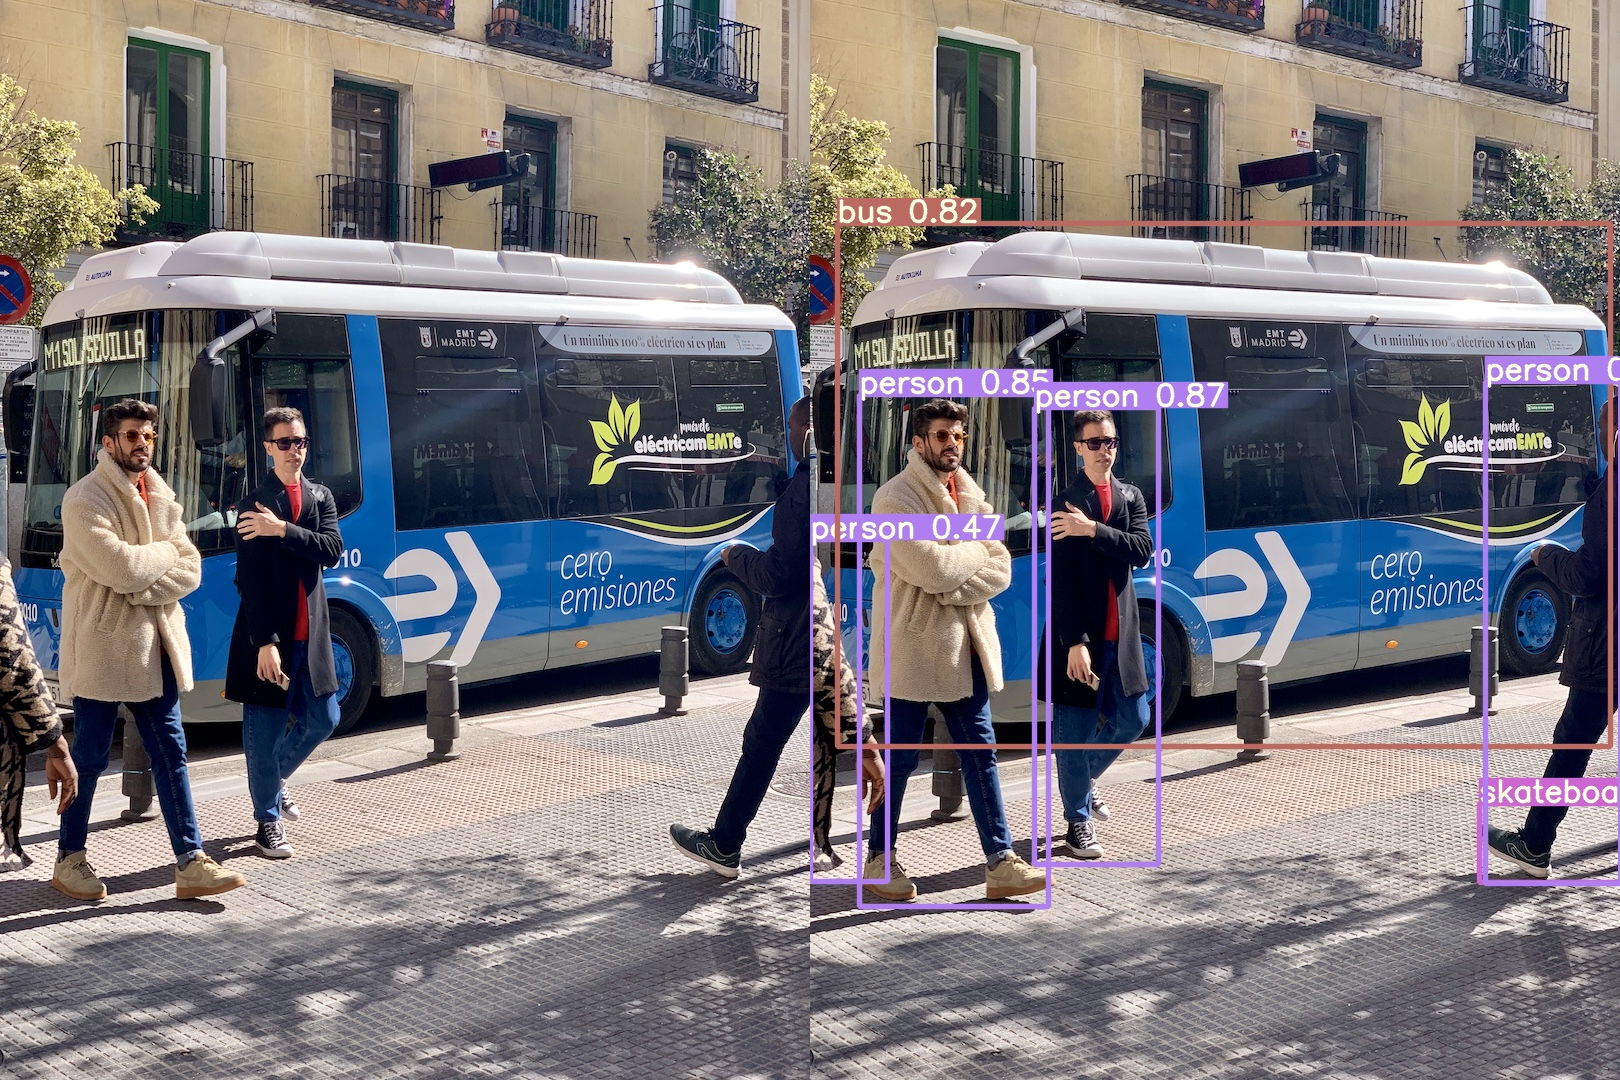

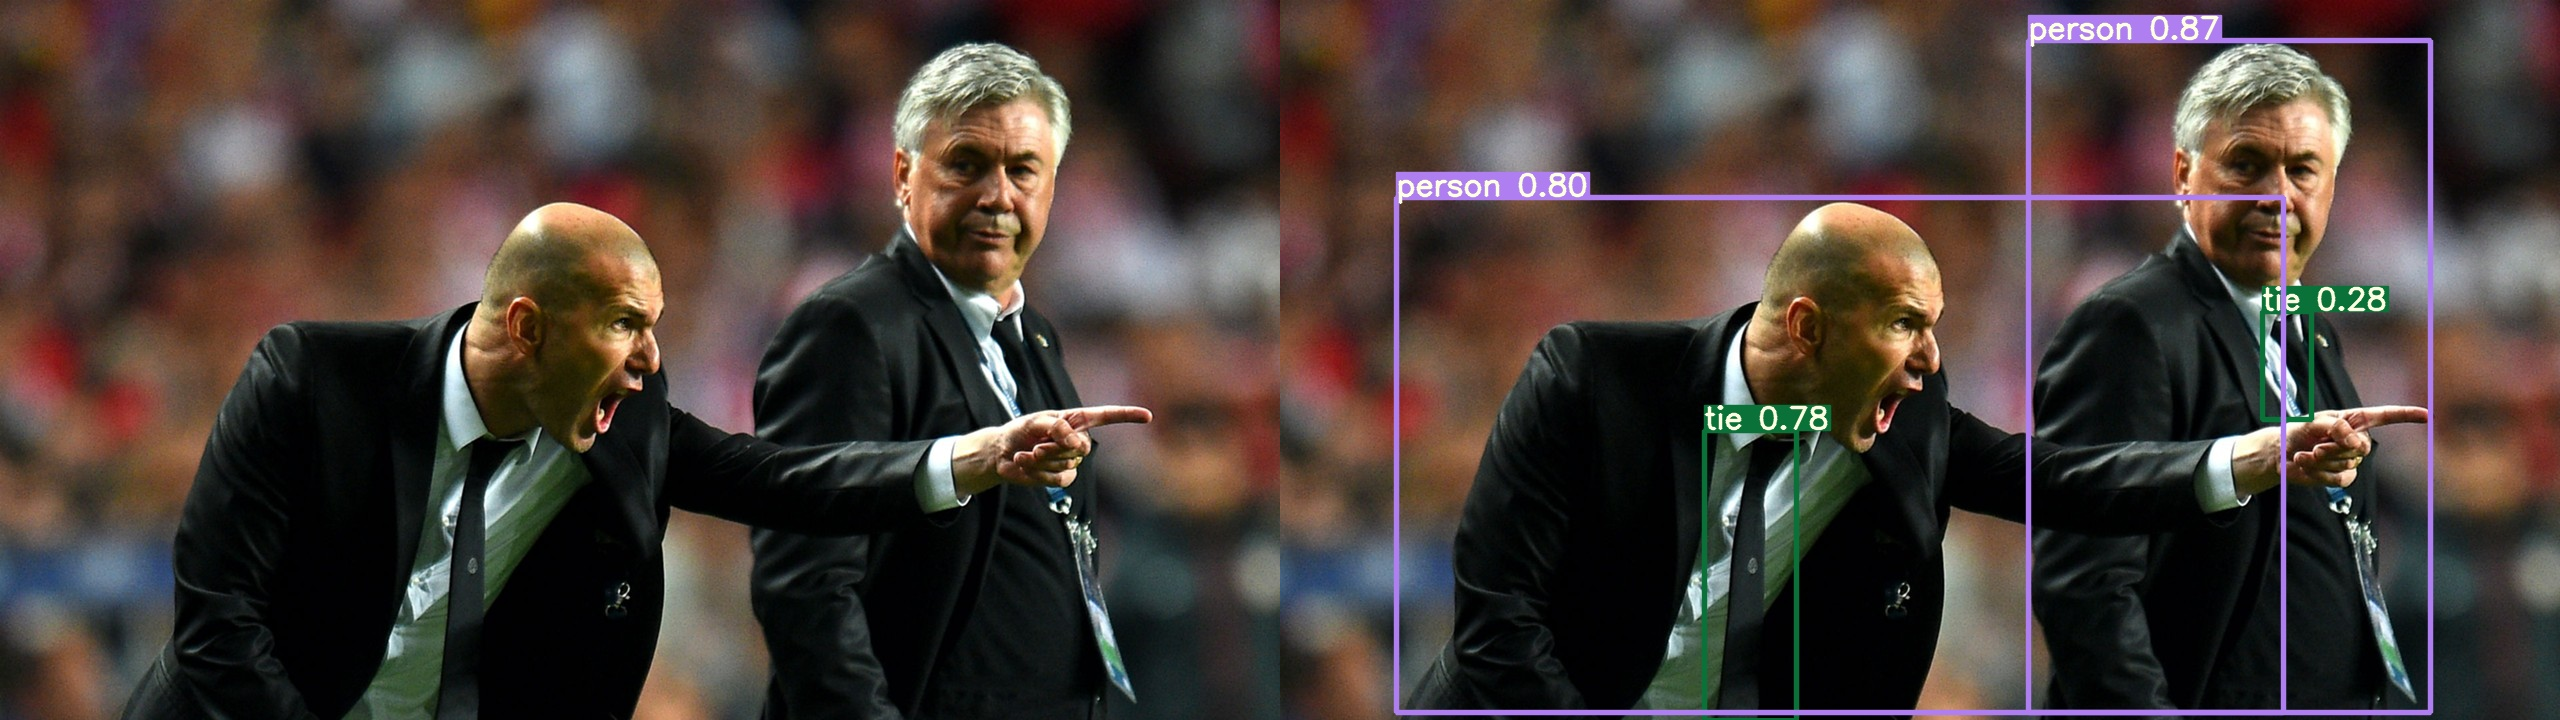

In [5]:
from google.colab.patches import cv2_imshow
import cv2
import os

src_dir, out_dir = 'inference/images/', 'inference/output/'

for i in os.listdir(out_dir):
  res = cv2.imread( os.path.join( out_dir, i))
  src = cv2.imread( os.path.join( src_dir, i))
  cv2_imshow( cv2.hconcat( [src, res]))

# 與 faster RCNN 進行比較

person : 8, 
orange : 1, 
car : 2, 
traffic light : 1,
bus : 1

Cost time: 8.154329776763916s (CPU)
![](https://drive.google.com/uc?export=view&id=12BDNHM7OowvaK8qfvEh4oJsm1auLHzlP)

In [ ]:
!python detect.py --source ../../images/obj_image.jpg --weights yolov5l.pt --conf 0.8

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.8, device='', img_size=640, iou_thres=0.45, save_conf=False, save_dir='inference/output', save_txt=False, source='../../images/obj_image.jpg', update=False, view_img=False, weights=['yolov5l.pt'])
Using CPU

Fusing layers... 
Model Summary: 236 layers, 4.77901e+07 parameters, 0 gradients
image 1/1 /content/drive/My Drive/人生KPI/工作坊/1091120_NQU_AI/images/obj_image.jpg: 352x640 5 persons, 1 cars, 1 buss, Done. (1.062s)
Results saved to inference/output
Done. (1.092s)


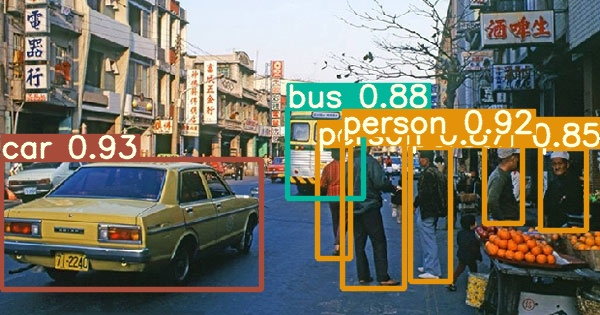

In [ ]:
yolov5 = cv2.imread('inference/output/obj_image.jpg')
cv2_imshow(yolov5)